In [4]:
!pip install cpnet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 38.1 MB 1.4 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
# Import OS for navigation and environment set up
import os
# Check current location, '/content' is the Colab virtual machine
print(os.getcwd())
# Enable the Kaggle environment, use the path to the directory your Kaggle API JSON is stored in
# os.environ['KAGGLE_CONFIG_DIR'] = '/gdrive/MyDrive/NFT_Research'

/content


In [8]:
path = '/gdrive/MyDrive/BNS-LQTY/Main'
os.chdir(path)
os.listdir(path)

['LUSD_02_Feature_Analysis.ipynb',
 '02_Feature_Analysis.ipynb',
 '01_Network_Features.py']

In [5]:
import os
import time
import numpy as np
import pandas as pd
from datetime import datetime, date
from dateutil.relativedelta import relativedelta
import community
import networkx as nx
import cpnet
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [18]:
token_name = 'LUSD'
start_date = '2021-04-09'
end_date = '2022-04-09'
DATA_DIR = f'../Data/{token_name}_{start_date}-{end_date}'
FIGURE_DIR = f'../Figure/{token_name}_{start_date}-{end_date}'

if os.path.exists(DATA_DIR) is False:
    os.makedirs(DATA_DIR)
    
if os.path.exists(FIGURE_DIR) is False:
    os.makedirs(FIGURE_DIR)

In [9]:
raw_tx = pd.read_csv(f'{DATA_DIR}/raw_tx.csv')
agg_tx = pd.read_csv(f'{DATA_DIR}/agg_tx.csv')
network_fea = pd.read_csv(f'{DATA_DIR}/network_fea.csv')
core_days_cnt = pd.read_csv(f'{DATA_DIR}/core_days_cnt.csv')

## Visualization

#### Distribution on significant & insignificant days 

In [11]:
sig_T = network_fea[network_fea['significance'] < 0.05]
sig_F = network_fea[network_fea['significance'] >= 0.05]

print(f'Number of significant days VS insignificant days: {sig_T.shape[0]} | {sig_F.shape[0]}')

sig_T.head()

Number of significant days VS insignificant days: 297 | 68


,timestamp,num_edges,num_nodes,degree_mean,degree_std,top10_degree_mean,top10_degree_std,top10_degree_ratio,degree_centrality_mean,degree_centrality_std,...,transitivity,eigenvector_centrality_mean,eigenvector_centrality_atd,closeness_centrality_mean,closeness_centrality_std,num_components,giant_com_ratio,num_core,avg_core_neighbor,significance
0,2021-04-09,481,255,3.427451,12.988443,45.0,49.889879,13.129291,0.013494,0.051136,...,0.011032,0.044803,0.043752,0.389422,0.049523,1,1.000000,3,113.666667,0.0
1,2021-04-10,502,259,3.621622,13.744907,48.0,53.165778,13.253731,0.014037,0.053275,...,0.012609,0.043720,0.044154,0.394477,0.053270,1,1.000000,3,120.000000,0.0
2,2021-04-11,501,276,3.391304,13.649831,47.9,55.424634,14.124359,0.012332,0.049636,...,0.010734,0.042736,0.042389,0.395353,0.050371,1,1.000000,3,120.333333,0.0
3,2021-04-12,460,241,3.551867,13.248910,44.2,49.917532,12.444159,0.014799,0.055204,...,0.012408,0.045689,0.045408,0.399511,0.052784,1,1.000000,3,110.333333,0.0
4,2021-04-13,611,315,3.663492,15.939004,59.2,69.281744,16.159445,0.011667,0.050761,...,0.010830,0.039390,0.040287,0.406350,0.059644,2,0.993651,3,154.666667,0.0


In [38]:
import matplotlib as mpl

In [37]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


TypeError: ignored

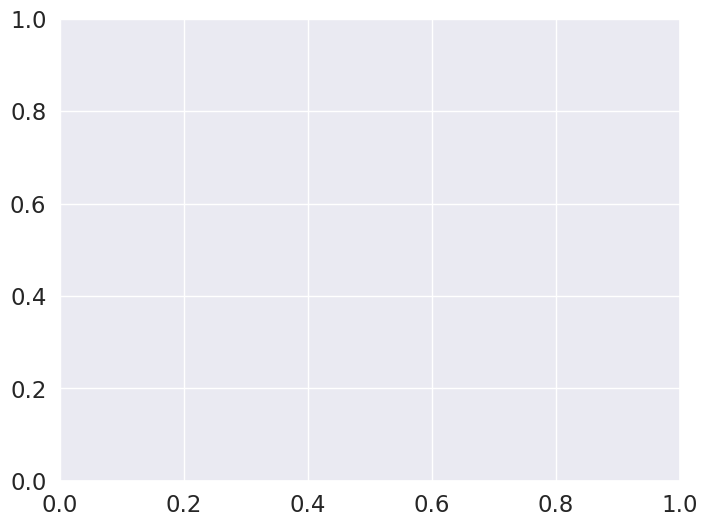

In [39]:
sample_sig_T_df = agg_tx[agg_tx['timestamp'] == '2021-06-27']

G = nx.from_pandas_edgelist(sample_sig_T_df, 'from_address', 'to_address', 'value', nx.Graph())

# Detecting discrete core-periphery structure
alg = cpnet.BE()        # Load the Borgatti-Everett algorithm
alg.detect(G)           # Feed the G as an input
x = alg.get_coreness()  # Get the coreness of nodes
c = alg.get_pair_id()   # Get the group membership of nodes

fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = cpnet.draw(G, c, x, ax)

TypeError: ignored

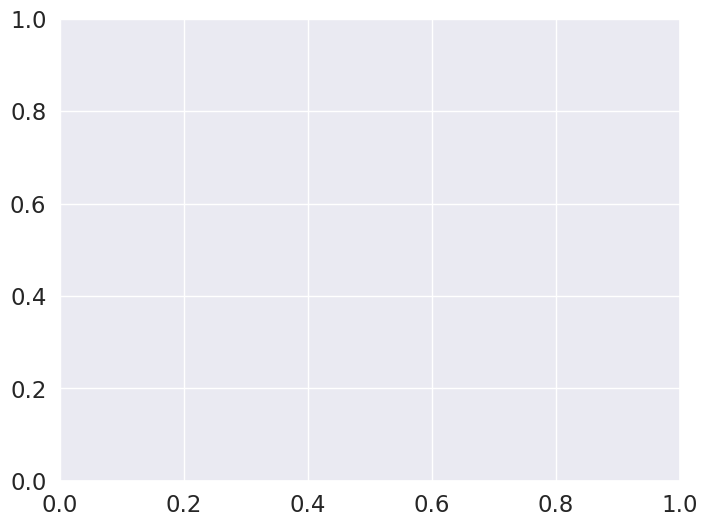

In [31]:
sample_sig_F_df = agg_tx[agg_tx['timestamp'] == '2022-02-02']

G = nx.from_pandas_edgelist(sample_sig_F_df, 'from_address', 'to_address', 'value', nx.Graph())

# Detecting discrete core-periphery structure
alg = cpnet.BE()        # Load the Borgatti-Everett algorithm
alg.detect(G)           # Feed the G as an input
x = alg.get_coreness()  # Get the coreness of nodes
c = alg.get_pair_id()   # Get the group membership of nodes

fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = cpnet.draw(G, c, x, ax)

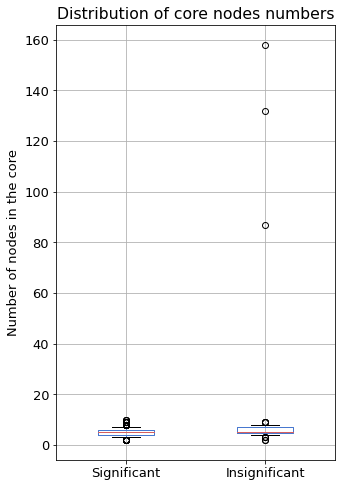

In [20]:
num_core_sig_T = sig_T['num_core']
num_core_sig_F = sig_F['num_core']

plt.style.use('seaborn-muted')
plt.figure(figsize=(5, 8))
dt = pd.DataFrame({'Significant':num_core_sig_T, 'Insignificant':num_core_sig_F})
dt.boxplot(widths = 0.4,whis=0.5)
plt.title('Distribution of core nodes numbers')
plt.ylabel('Number of nodes in the core')
plt.rc('font', size=13) # controls default text sizes
plt.savefig(f'{FIGURE_DIR}/Distribution_of_core_nodes_numbers')

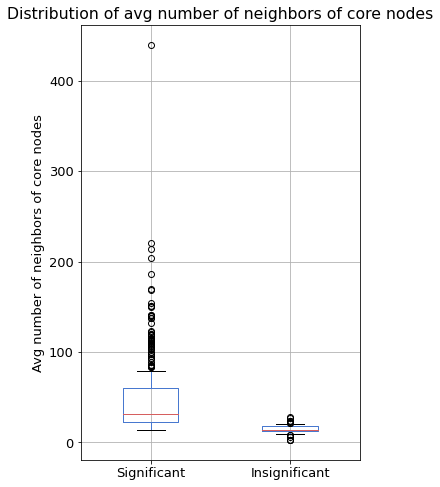

In [21]:
avg_core_neighbor_sig_T = sig_T['avg_core_neighbor']
avg_core_neighbor_sig_F = sig_F['avg_core_neighbor']

plt.figure(figsize=(5, 8))
dt = pd.DataFrame({'Significant':avg_core_neighbor_sig_T, 'Insignificant':avg_core_neighbor_sig_F})
dt.boxplot(widths = 0.4,whis=0.5)
plt.title('Distribution of avg number of neighbors of core nodes')
plt.ylabel('Avg number of neighbors of core nodes')
plt.rc('font', size=13)
plt.savefig(f'{FIGURE_DIR}/Distribution_of_avg_number_of_neighbors_of_core_nodes')

#### Core days count distribution of CA and EOA

In [22]:
def count_unique_addresses(x):
    addresses = list(x['from_address']) + list(x['to_address'])
    return pd.DataFrame({'address_count': [len(set(addresses))]})

network_fea['address_count'] = raw_tx.groupby('timestamp').apply(count_unique_addresses).reset_index().drop(columns=['level_1'])['address_count']
# network_fea['address_count'] = pd.merge(network_fea,
#                                         raw_tx.groupby('timestamp').apply(count_unique_addresses).reset_index().drop(columns=['level_1']),
#                                         on='timestamp',
#                                         how='left')
network_fea['value'] = agg_tx['value']
network_fea

,timestamp,num_edges,num_nodes,degree_mean,degree_std,top10_degree_mean,top10_degree_std,top10_degree_ratio,degree_centrality_mean,degree_centrality_std,...,eigenvector_centrality_atd,closeness_centrality_mean,closeness_centrality_std,num_components,giant_com_ratio,num_core,avg_core_neighbor,significance,address_count,value
0,2021-04-09,481,255,3.427451,12.988443,45.0,49.889879,13.129291,0.013494,0.051136,...,0.043752,0.389422,0.049523,1,1.000000,3,113.666667,0.000000,255,2.985070e+21
1,2021-04-10,502,259,3.621622,13.744907,48.0,53.165778,13.253731,0.014037,0.053275,...,0.044154,0.394477,0.053270,1,1.000000,3,120.000000,0.000000,259,6.845770e+22
2,2021-04-11,501,276,3.391304,13.649831,47.9,55.424634,14.124359,0.012332,0.049636,...,0.042389,0.395353,0.050371,1,1.000000,3,120.333333,0.000000,276,1.291542e+23
3,2021-04-12,460,241,3.551867,13.248910,44.2,49.917532,12.444159,0.014799,0.055204,...,0.045408,0.399511,0.052784,1,1.000000,3,110.333333,0.000000,241,1.492339e+24
4,2021-04-13,611,315,3.663492,15.939004,59.2,69.281744,16.159445,0.011667,0.050761,...,0.040287,0.406350,0.059644,2,0.993651,3,154.666667,0.000000,315,1.791040e+21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2022-04-04,108,65,2.953846,2.999645,8.5,4.224926,2.877604,0.046154,0.046869,...,0.089718,0.284954,0.050260,1,1.000000,7,9.857143,0.217575,65,4.066250e+21
361,2022-04-05,116,74,2.810811,3.427534,9.4,5.748043,3.344231,0.038504,0.046953,...,0.083207,0.286857,0.069106,2,0.972973,2,20.000000,0.134828,74,1.970150e+22
362,2022-04-06,134,88,2.659091,3.544799,10.4,6.232175,3.911111,0.030564,0.040745,...,0.077843,0.287010,0.048937,1,1.000000,5,14.400000,0.193030,88,7.263680e+21
363,2022-04-07,112,76,2.684211,3.057392,9.0,4.753946,3.352941,0.035789,0.040765,...,0.082735,0.269936,0.063097,2,0.973684,6,11.833333,0.111485,76,0.000000e+00


In [23]:
print(f'CA vs EOA: {core_days_cnt_CA.shape[0]} | {core_days_cnt_EOA.shape[0]}')

NameError: ignored

In [24]:
plt.style.use('seaborn-muted')
plt.figure(figsize=(8, 8))
dt = pd.DataFrame({'CA':core_days_cnt_CA['core_days_cnt'], 'EOA':core_days_cnt_EOA['core_days_cnt']})
dt.boxplot(widths = 0.4,whis=0.5)
plt.title('Core days count distribution of CA and EOA')
plt.ylabel('Number of days becoming core')
plt.rc('font', size=15)
plt.savefig(f'{FIGURE_DIR}/Core_days_count_distribution_of_CA_and_EOA')

NameError: ignored

<Figure size 576x576 with 0 Axes>

#### Network Dynamics

In [25]:
network_fea.rename(columns={'significance': 'cp_pvalue'}, inplace=True)

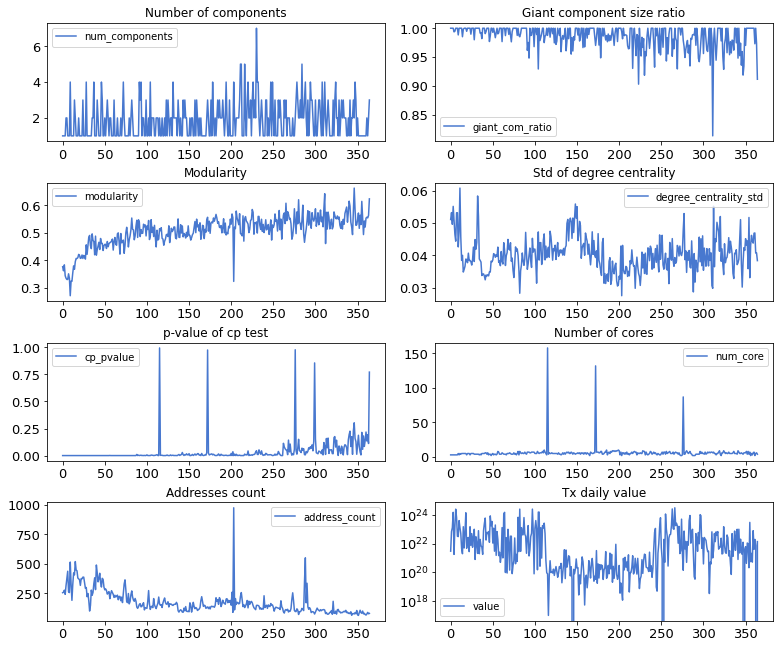

In [26]:
fig,axes = plt.subplots(4,2)
plt.style.use('default')

# Number of components
ax = network_fea[['num_components']].plot(ax=axes[0,0], figsize=(13,10), grid=False, title='Number of components', xlabel=' ')
# ax.set_yscale('log')

# Gaint component ratio
network_fea[['giant_com_ratio']].plot(ax=axes[0,1], figsize=(13,7), grid=False, title='Giant component size ratio', xlabel=' ')

# Modularity
network_fea[['modularity']].plot(ax=axes[1,0], figsize=(13,7), grid=False, title='Modularity', xlabel=' ')

# Std of degree centrality
network_fea[['degree_centrality_std']].plot(ax=axes[1,1], figsize=(13,7), grid=False, title='Std of degree centrality',xlabel=' ')

# p-value of cp test
network_fea[['cp_pvalue']].plot(ax=axes[2,0], figsize=(13,11), grid=False, title='p-value of cp test', xlabel=' ')

# Number of cores
network_fea[['num_core']].plot(ax=axes[2,1], figsize=(13,11), grid=False, title='Number of cores', xlabel=' ')

# Addresses count
network_fea[['address_count']].plot(ax=axes[3,0], figsize=(13,11), grid=False, title='Addresses count', xlabel=' ')

# Tx daily value
ax = network_fea[['value']].plot(ax=axes[3,1], figsize=(13,11), grid=False, title='Tx daily value', xlabel=' ')
ax.set_yscale('log')

plt.subplots_adjust(wspace =0.15, hspace =0.35)
plt.savefig(f'{FIGURE_DIR}/Network_Dynamics')

#### Correlations of network features

In [28]:
network_fea_cor = network_fea[['num_components', 'giant_com_ratio', 'modularity', 'degree_centrality_std', 'cp_pvalue']].corr()
network_fea_cor

,num_components,giant_com_ratio,modularity,degree_centrality_std,cp_pvalue
num_components,1.000000,-0.788643,0.184347,-0.284550,0.068828
giant_com_ratio,-0.788643,1.000000,-0.374221,0.165638,-0.190939
modularity,0.184347,-0.374221,1.000000,-0.326624,0.293703
degree_centrality_std,-0.284550,0.165638,-0.326624,1.000000,0.027892
cp_pvalue,0.068828,-0.190939,0.293703,0.027892,1.000000


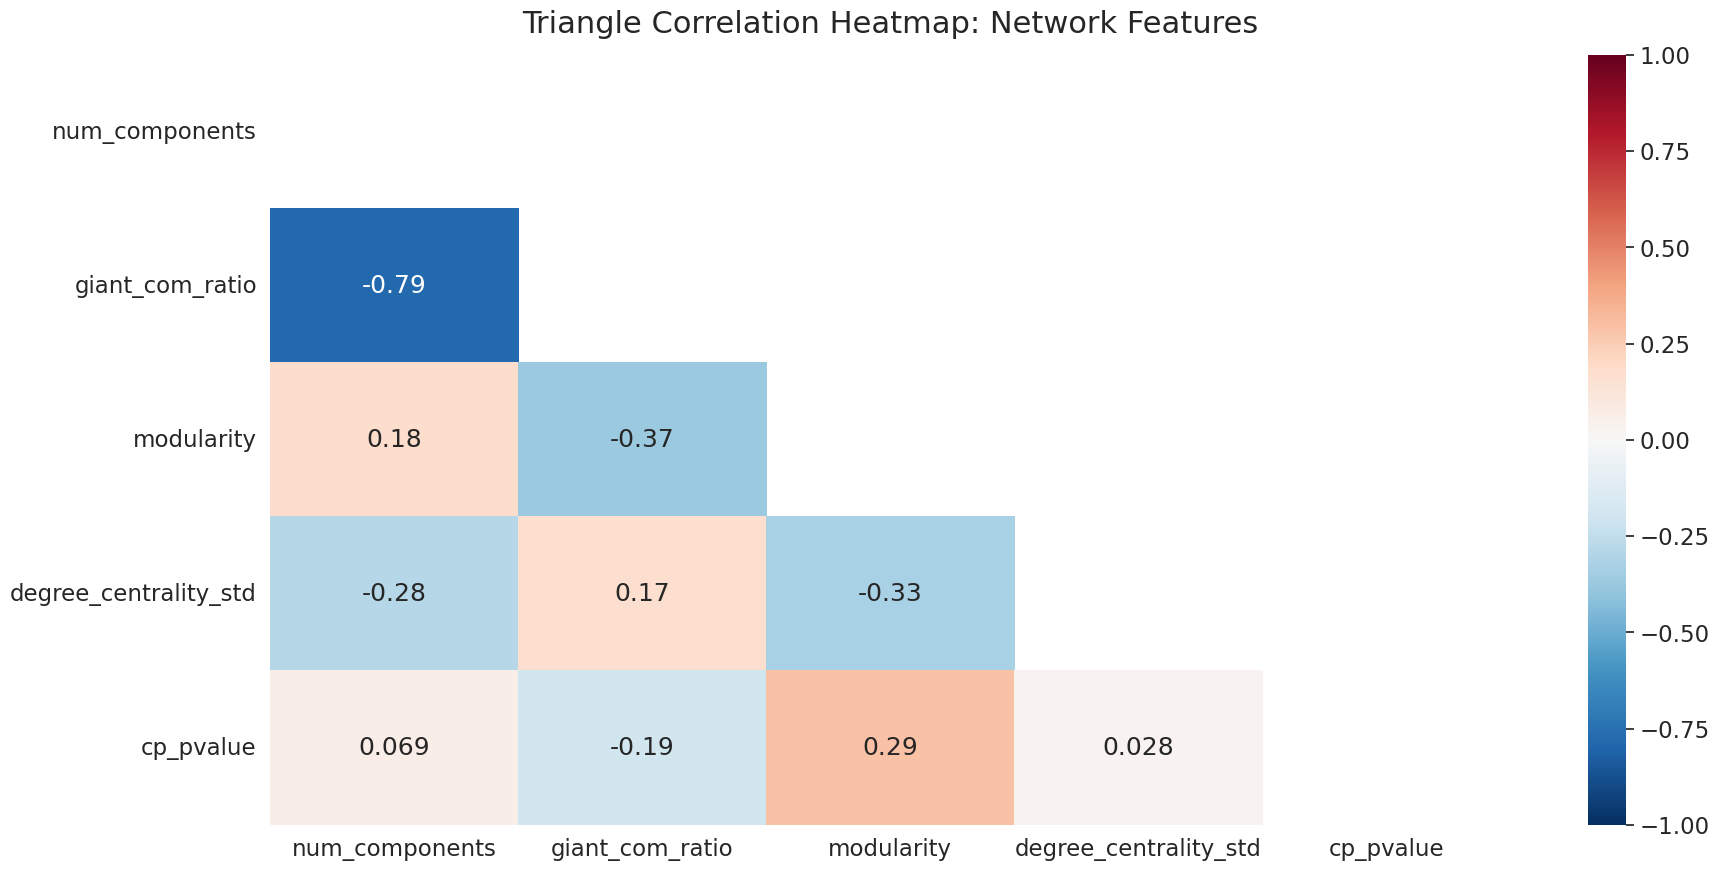

In [29]:
plt.style.use('default')
plt.figure(figsize=(20, 10))

mask = np.triu(np.ones_like(network_fea_cor, dtype=np.bool))
sns.set(font_scale=1.5) 
heatmap = sns.heatmap(network_fea_cor, mask=mask, vmin=-1, vmax=1, annot=True, cmap='RdBu_r') #control colors: https://www.python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/#:~:text=You%20can%20customize%20the%20colors,heatmap()%20function%20in%20seaborn.&text=It%20is%20also%20possible%20to,vmin%20parameters%20in%20the%20function.
heatmap.set_title('Triangle Correlation Heatmap: Network Features', fontdict={'fontsize':22}, pad=16);

heatmap.set_facecolor((1,1,1))
plt.savefig(f'{FIGURE_DIR}/Correlation_Heatmap')
